In [1]:
#@title Importing Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Flatten, Conv2D, Dense, MaxPooling2D, BatchNormalization, Dropout
from keras.optimizers import SGD, Adam
from keras.callbacks import EarlyStopping
from sklearn.metrics import ConfusionMatrixDisplay, precision_score, recall_score, f1_score

In [2]:
#@title Preprocessing
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train/np.max(x_train) 
x_test = x_test/np.max(x_test)
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)
Labels = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
# validation split:
split_num = 45056
x_valid = x_train[split_num:]
y_valid = y_train[split_num:]; y_valid_cat = y_train_cat[split_num:]
x_train = x_train[:split_num]
y_train = y_train[:split_num]; y_train_cat = y_train_cat[:split_num]

170498071/170498071 [==============================] - 13s 0us/step


Text(0.5, 0.98, 'first 10 of train data with lables')

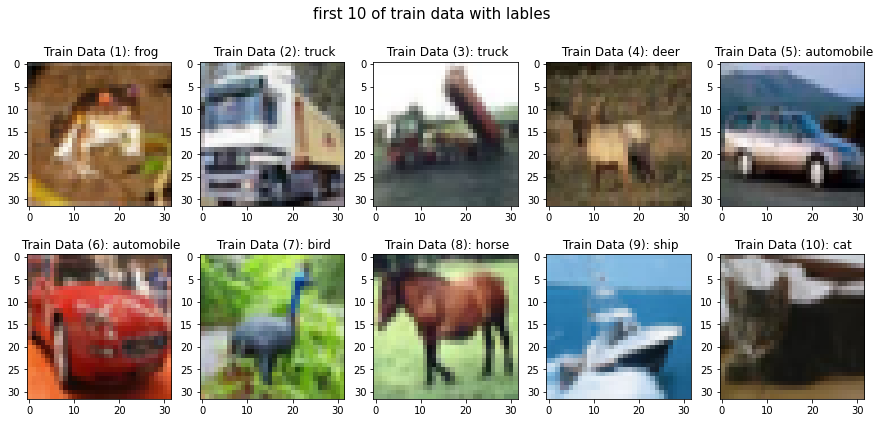

In [ ]:
#@title Showing the train data
plt.figure(figsize=(15, 6.5)) 
for i in range(10):
  plt.subplot(2, 5, i+1)
  plt.imshow(x_train[i])
  plt.title(f' Train Data ({i+1}): {Labels[y_train[i][0]]}')
plt.suptitle('first 10 of train data with lables', fontsize = 15)

In [4]:
#@title Functions
def MLP(x_train, y_train_cat, x_valid, y_valid_cat, hidden_size1, hidden_size2, batchsize, option, optimizer, Epoch):
  _, i, j, k = x_train.shape
  _, n_class = y_train_cat.shape
  mlp = Sequential()
  mlp.add(Flatten())
  mlp.add(Dense(hidden_size1, input_dim = i*j*k, activation = option[0]))
  mlp.add(Dense(hidden_size2, activation = option[1]))
  mlp.add(Dense(n_class, activation = 'softmax'))
  mlp.compile(optimizer, loss = option[2], metrics=['accuracy'])
  History = mlp.fit(x_train, y_train_cat, epochs = Epoch, batch_size = batchsize, validation_data = (x_valid, y_valid_cat))
  mlp.summary()
  return mlp, History

def Plot_loss_acc(History, batchsize):
  plt.figure(figsize=(15, 6)) 
  plt.subplot(1,2,1)
  plt.plot(History.history['accuracy'], 'b', label = 'train')
  plt.plot(History.history['val_accuracy'], 'r', label = 'validation')
  plt.title(f'Accuracy (batch-size = {batchsize})')
  plt.xlabel('epoch')
  plt.legend()
  plt.subplot(1,2,2)
  plt.plot(History.history['loss'], 'b', label = 'train')
  plt.plot(History.history['val_loss'], 'r', label = 'validation')
  plt.title(f'Loss (batch-size = {batchsize})')
  plt.xlabel('epoch')
  plt.legend()
  plt.suptitle(f'Comparing train and validation metrics (batch-size = {batchsize})', fontsize = 15)

def CNN(x_train, y_train_cat, x_valid, y_valid_cat, hidden_size1, hidden_size2, batchsize, Epoch):
  _, i, j, k = x_train.shape
  _, n_class = y_train_cat.shape
  cnn = Sequential()
  cnn.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
  cnn.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  cnn.add(Flatten())
  cnn.add(Dense(hidden_size1, input_dim = i*j*k, activation = 'relu'))
  cnn.add(Dense(hidden_size2, activation = 'relu'))
  cnn.add(Dense(n_class, activation = 'softmax'))
  optimizer = SGD(learning_rate = 0.01, momentum = 0.9)
  cnn.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
  History = cnn.fit(x_train, y_train_cat, epochs = Epoch, batch_size = batchsize, validation_data = (x_valid, y_valid_cat))
  cnn.summary()
  return cnn, History

def CNN_P_BN(x_train, y_train_cat, x_valid, y_valid_cat, hidden_size1, hidden_size2, batchsize, Epoch): # CNN with Pooling and Batch-Normaization
  _, i, j, k = x_train.shape
  _, n_class = y_train_cat.shape
  cnn = Sequential()
  cnn.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
  cnn.add(BatchNormalization())
  cnn.add(MaxPooling2D(2, 2))
  cnn.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  cnn.add(BatchNormalization())
  cnn.add(MaxPooling2D(2, 2))
  cnn.add(Flatten())
  cnn.add(Dense(hidden_size1, input_dim = i*j*k, activation = 'relu'))
  cnn.add(Dense(hidden_size2, activation = 'relu'))
  cnn.add(Dense(n_class, activation = 'softmax'))
  optimizer = SGD(learning_rate = 0.01, momentum = 0.9)
  cnn.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
  History = cnn.fit(x_train, y_train_cat, epochs = Epoch, batch_size = batchsize, validation_data = (x_valid, y_valid_cat))
  cnn.summary()
  return cnn, History

def CNN_P_BN_dropout(x_train, y_train_cat, x_valid, y_valid_cat, hidden_size1, hidden_size2, batchsize, Epoch): # CNN with Pooling and Batch-Normaization
  _, i, j, k = x_train.shape
  _, n_class = y_train_cat.shape
  cnn = Sequential()
  cnn.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
  cnn.add(BatchNormalization())
  cnn.add(MaxPooling2D(2, 2))
  cnn.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  cnn.add(BatchNormalization())
  cnn.add(MaxPooling2D(2, 2))
  cnn.add(Dropout(0.2))
  cnn.add(Flatten())
  cnn.add(Dense(hidden_size1, input_dim = i*j*k, activation = 'relu'))
  cnn.add(Dense(hidden_size2, activation = 'relu'))
  cnn.add(Dropout(0.3))
  cnn.add(Dense(n_class, activation = 'softmax'))
  optimizer = SGD(learning_rate = 0.01, momentum = 0.9)
  cnn.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
  History = cnn.fit(x_train, y_train_cat, epochs = Epoch, batch_size = batchsize, validation_data = (x_valid, y_valid_cat))
  cnn.summary()
  return cnn, History

def CNN_P_BN_dropout_es(x_train, y_train_cat, x_valid, y_valid_cat, hidden_size1, hidden_size2, batchsize, ES, Epoch): # CNN with Pooling and Batch-Normaization
  _, i, j, k = x_train.shape
  _, n_class = y_train_cat.shape
  cnn = Sequential()
  cnn.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
  cnn.add(BatchNormalization())
  cnn.add(MaxPooling2D(2, 2))
  cnn.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  cnn.add(BatchNormalization())
  cnn.add(MaxPooling2D(2, 2))
  cnn.add(Dropout(0.2))
  cnn.add(Flatten())
  cnn.add(Dense(hidden_size1, input_dim = i*j*k, activation = 'relu'))
  cnn.add(Dense(hidden_size2, activation = 'relu'))
  cnn.add(Dropout(0.3))
  cnn.add(Dense(n_class, activation = 'softmax'))
  optimizer = SGD(learning_rate = 0.01, momentum = 0.9)
  cnn.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
  History = cnn.fit(x_train, y_train_cat, epochs = Epoch, batch_size = batchsize, validation_data = (x_valid, y_valid_cat), callbacks = [ES])
  cnn.summary()
  return cnn, History

> ***Part a.*** Using the Multi-Layer Perceptron (MLP)

>> **Problem 1.** Different Batch-size

Epoch 1/20
1408/1408 [==============================] - 7s 5ms/step - loss: 1.8839 - accuracy: 0.3109 - val_loss: 1.7784 - val_accuracy: 0.3677
Epoch 2/20
1408/1408 [==============================] - 6s 4ms/step - loss: 1.7281 - accuracy: 0.3752 - val_loss: 1.6831 - val_accuracy: 0.3928
Epoch 3/20
1408/1408 [==============================] - 4s 3ms/step - loss: 1.6568 - accuracy: 0.4037 - val_loss: 1.6704 - val_accuracy: 0.4092
Epoch 4/20
1408/1408 [==============================] - 4s 3ms/step - loss: 1.6183 - accuracy: 0.4196 - val_loss: 1.6238 - val_accuracy: 0.4128
Epoch 5/20
1408/1408 [==============================] - 4s 3ms/step - loss: 1.5841 - accuracy: 0.4307 - val_loss: 1.6513 - val_accuracy: 0.4140
Epoch 6/20
1408/1408 [==============================] - 4s 3ms/step - loss: 1.5602 - accuracy: 0.4442 - val_loss: 1.5694 - val_accuracy: 0.4397
Epoch 7/20
1408/1408 [==============================] - 4s 3ms/step - loss: 1.5422 - accuracy: 0.4456 - val_loss: 1.6843 - val_accuracy:

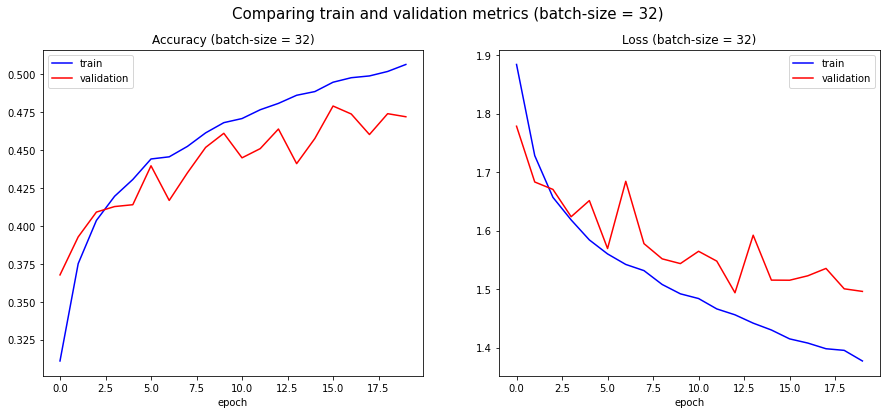

In [6]:
#@title Multi-Layer Perceptron (Batch-size = 32)
optimizer = SGD(lr = 0.01, momentum = 0.9)
option = ['relu', 'relu', 'categorical_crossentropy']
mlp_32, History_32 = MLP(x_train, y_train_cat, x_valid, y_valid_cat, 200, 100, 32, option, optimizer, Epoch = 20)
Plot_loss_acc(History_32, batchsize = 32)

313/313 [==============================] - 2s 5ms/step
Stochastic mini batch based MLP (Batch-size = 32) on test data:
 Accuracy = 45.809999108314514%
 Test-loss = 1.5368760824203491
 Precision = 47.237927305144225%
 Recall = 45.81%
 f-score = 44.47320570608554%


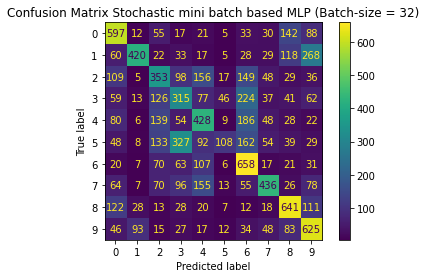

In [ ]:
#@title Metrics on test data (Batch-size = 32)
loss_test, acc = mlp_32.evaluate(x_test, y_test_cat, verbose = 0)
pred_test = np.argmax(mlp_32.predict(x_test), axis = 1)
ConfusionMatrixDisplay.from_predictions(y_test, pred_test)
plt.title('Confusion Matrix Stochastic mini batch based MLP (Batch-size = 32)')
Precision = precision_score(y_test, pred_test, average = 'weighted')
Recall = recall_score(y_test, pred_test, average = 'weighted')
f_score = f1_score(y_test, pred_test, average = 'weighted')
print(f'Stochastic mini batch based MLP (Batch-size = 32) on test data:\n Accuracy = {acc*100}%\n Test-loss = {loss_test}\n Precision = {Precision*100}%\n Recall = {Recall*100}%\n f-score = {f_score*100}%')

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/20
704/704 [==============================] - 10s 13ms/step - loss: 1.8616 - accuracy: 0.3211 - val_loss: 1.7495 - val_accuracy: 0.3693
Epoch 2/20
704/704 [==============================] - 8s 11ms/step - loss: 1.6921 - accuracy: 0.3922 - val_loss: 1.6499 - val_accuracy: 0.4140
Epoch 3/20
704/704 [==============================] - 6s 9ms/step - loss: 1.6115 - accuracy: 0.4225 - val_loss: 1.6047 - val_accuracy: 0.4252
Epoch 4/20
704/704 [==============================] - 7s 9ms/step - loss: 1.5612 - accuracy: 0.4424 - val_loss: 1.5556 - val_accuracy: 0.4474
Epoch 5/20
704/704 [==============================] - 7s 11ms/step - loss: 1.5242 - accuracy: 0.4552 - val_loss: 1.5550 - val_accuracy: 0.4490
Epoch 6/20
704/704 [==============================] - 6s 9ms/step - loss: 1.4960 - accuracy: 0.4653 - val_loss: 1.5403 - val_accuracy: 0.4517
Epoch 7/20
704/704 [==============================] - 6s 9ms/step - loss: 1.4660 - accuracy: 0.4759 - val_loss: 1.5299 - val_accuracy: 0.4551
Ep

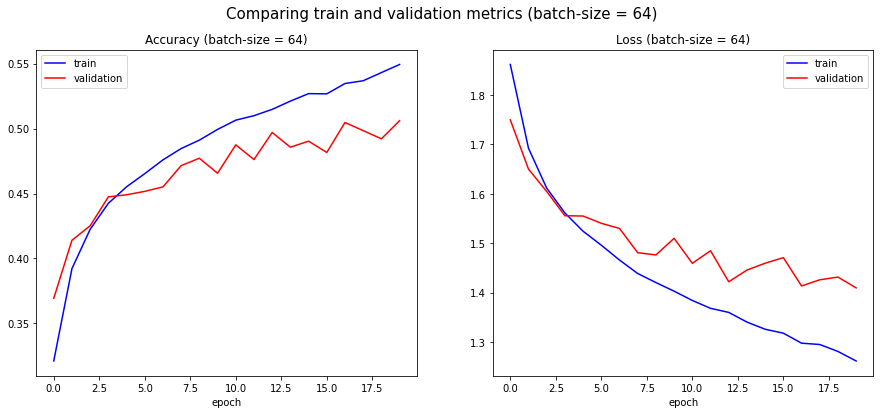

In [ ]:
#@title Multi-Layer Perceptron (Batch-size = 64)
optimizer = SGD(lr = 0.01, momentum = 0.9)
option = ['relu', 'relu', 'categorical_crossentropy']
mlp_64, History_64 = MLP(x_train, y_train_cat, x_valid, y_valid_cat, 200, 100, 64, option, optimizer, Epoch = 20)
Plot_loss_acc(History_64, batchsize = 64)

313/313 [==============================] - 1s 3ms/step
Stochastic mini batch based MLP (Batch-size = 64) on test data:
 Accuracy = 49.790000915527344%
 Test-loss = 1.4227638244628906
 Precision = 50.49974948765814%
 Recall = 49.79%
 f-score = 49.31798093506379%


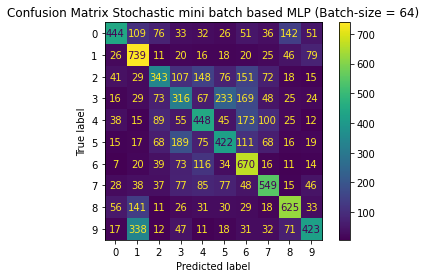

In [ ]:
#@title Metrics on test data (Batch-size = 64)
loss_test, acc = mlp_64.evaluate(x_test, y_test_cat, verbose = 0)
pred_test = np.argmax(mlp_64.predict(x_test), axis = 1)
ConfusionMatrixDisplay.from_predictions(y_test, pred_test)
plt.title('Confusion Matrix Stochastic mini batch based MLP (Batch-size = 64)')
Precision = precision_score(y_test, pred_test, average = 'weighted')
Recall = recall_score(y_test, pred_test, average = 'weighted')
f_score = f1_score(y_test, pred_test, average = 'weighted')
print(f'Stochastic mini batch based MLP (Batch-size = 64) on test data:\n Accuracy = {acc*100}%\n Test-loss = {loss_test}\n Precision = {Precision*100}%\n Recall = {Recall*100}%\n f-score = {f_score*100}%')

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/20
176/176 [==============================] - 9s 40ms/step - loss: 1.9075 - accuracy: 0.3128 - val_loss: 1.7793 - val_accuracy: 0.3687
Epoch 2/20
176/176 [==============================] - 4s 22ms/step - loss: 1.7081 - accuracy: 0.3943 - val_loss: 1.6911 - val_accuracy: 0.4051
Epoch 3/20
176/176 [==============================] - 4s 22ms/step - loss: 1.6334 - accuracy: 0.4207 - val_loss: 1.6255 - val_accuracy: 0.4316
Epoch 4/20
176/176 [==============================] - 4s 22ms/step - loss: 1.5818 - accuracy: 0.4385 - val_loss: 1.5780 - val_accuracy: 0.4320
Epoch 5/20
176/176 [==============================] - 4s 22ms/step - loss: 1.5312 - accuracy: 0.4571 - val_loss: 1.5598 - val_accuracy: 0.4561
Epoch 6/20
176/176 [==============================] - 4s 22ms/step - loss: 1.5046 - accuracy: 0.4670 - val_loss: 1.5599 - val_accuracy: 0.4480
Epoch 7/20
176/176 [==============================] - 4s 22ms/step - loss: 1.4667 - accuracy: 0.4810 - val_loss: 1.4978 - val_accuracy: 0.4648

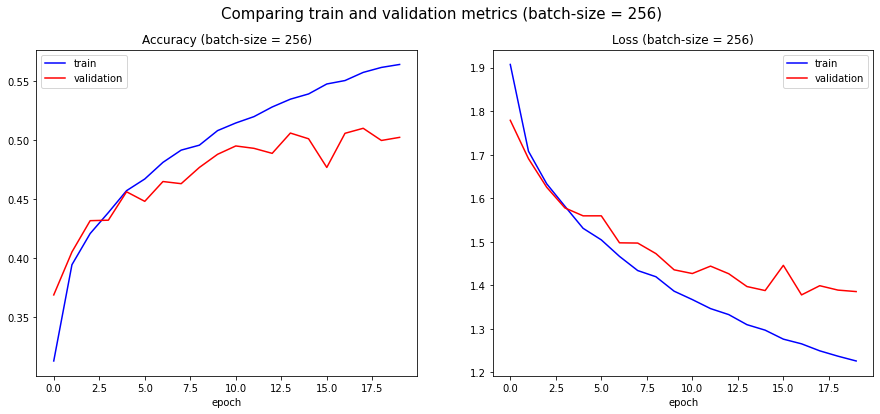

In [ ]:
#@title Multi-Layer Perceptron (Batch-size = 256)
optimizer = SGD(lr = 0.01, momentum = 0.9)
option = ['relu', 'relu', 'categorical_crossentropy']
mlp_256, History_256 = MLP(x_train, y_train_cat, x_valid, y_valid_cat, 200, 100, 256, option, optimizer, Epoch = 20)
Plot_loss_acc(History_256, batchsize = 256)

313/313 [==============================] - 1s 3ms/step
Stochastic mini batch based MLP (Batch-size = 256) on test data:
 Accuracy = 50.58000087738037%
 Test-loss = 1.398481845855713
 Precision = 52.019889055489145%
 Recall = 50.580000000000005%
 f-score = 50.4841062246878%


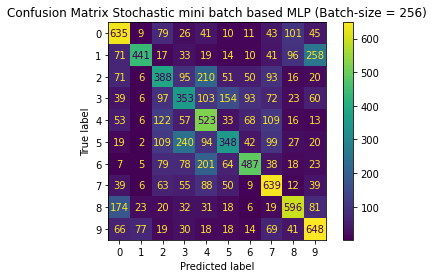

In [ ]:
#@title Metrics on test data (Batch-size = 256)
loss_test, acc = mlp_256.evaluate(x_test, y_test_cat, verbose = 0)
pred_test = np.argmax(mlp_256.predict(x_test), axis = 1)
ConfusionMatrixDisplay.from_predictions(y_test, pred_test)
plt.title('Confusion Matrix Stochastic mini batch based MLP (Batch-size = 256)')
Precision = precision_score(y_test, pred_test, average = 'weighted')
Recall = recall_score(y_test, pred_test, average = 'weighted')
f_score = f1_score(y_test, pred_test, average = 'weighted')
print(f'Stochastic mini batch based MLP (Batch-size = 256) on test data:\n Accuracy = {acc*100}%\n Test-loss = {loss_test}\n Precision = {Precision*100}%\n Recall = {Recall*100}%\n f-score = {f_score*100}%')

>> **Problem 2.** Different Activation Functions

Epoch 1/20
176/176 [==============================] - 5s 24ms/step - loss: 1.9057 - accuracy: 0.3190 - val_loss: 1.7844 - val_accuracy: 0.3503
Epoch 2/20
176/176 [==============================] - 4s 23ms/step - loss: 1.7153 - accuracy: 0.3943 - val_loss: 1.6717 - val_accuracy: 0.4074
Epoch 3/20
176/176 [==============================] - 4s 22ms/step - loss: 1.6291 - accuracy: 0.4244 - val_loss: 1.6207 - val_accuracy: 0.4227
Epoch 4/20
176/176 [==============================] - 4s 22ms/step - loss: 1.5820 - accuracy: 0.4402 - val_loss: 1.5882 - val_accuracy: 0.4328
Epoch 5/20
176/176 [==============================] - 4s 22ms/step - loss: 1.5465 - accuracy: 0.4511 - val_loss: 1.5758 - val_accuracy: 0.4448
Epoch 6/20
176/176 [==============================] - 4s 22ms/step - loss: 1.5183 - accuracy: 0.4619 - val_loss: 1.5408 - val_accuracy: 0.4529
Epoch 7/20
176/176 [==============================] - 4s 22ms/step - loss: 1.4886 - accuracy: 0.4697 - val_loss: 1.5225 - val_accuracy: 0.4684

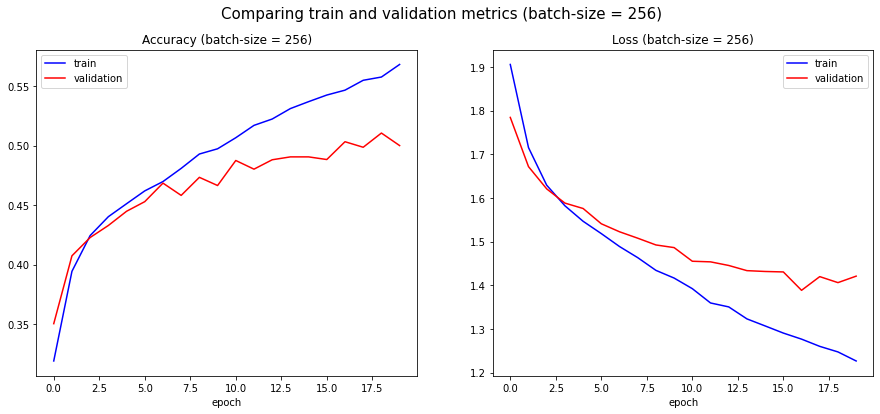

In [ ]:
#@title Multi-Layer Perceptron (Batch-size = 256) - activation functions : {tanh, tanh}
optimizer = SGD(lr = 0.01, momentum = 0.9)
option = ['tanh', 'tanh', 'categorical_crossentropy']
mlp_256, History_256 = MLP(x_train, y_train_cat, x_valid, y_valid_cat, 200, 100, 256, option, optimizer, Epoch = 20)
Plot_loss_acc(History_256, batchsize = 256)

313/313 [==============================] - 1s 3ms/step
Stochastic mini batch based MLP (Batch-size = 256) on test data:
 activation functions : (tanh, tanh)
 Accuracy = 49.00999963283539%
 Test-loss = 1.4366286993026733
 Precision = 52.34344074130307%
 Recall = 49.01%
 f-score = 48.64214984179133%


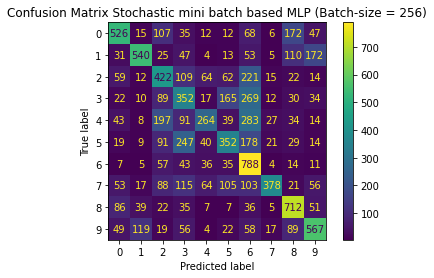

In [ ]:
#@title Metrics on test data (Batch-size = 256) - activation functions : {tanh, tanh}
loss_test, acc = mlp_256.evaluate(x_test, y_test_cat, verbose = 0)
pred_test = np.argmax(mlp_256.predict(x_test), axis = 1)
ConfusionMatrixDisplay.from_predictions(y_test, pred_test)
plt.title('Confusion Matrix Stochastic mini batch based MLP (Batch-size = 256)')
Precision = precision_score(y_test, pred_test, average = 'weighted')
Recall = recall_score(y_test, pred_test, average = 'weighted')
f_score = f1_score(y_test, pred_test, average = 'weighted')
print(f'Stochastic mini batch based MLP (Batch-size = 256) on test data:\n activation functions : (tanh, tanh)\n Accuracy = {acc*100}%\n Test-loss = {loss_test}\n Precision = {Precision*100}%\n Recall = {Recall*100}%\n f-score = {f_score*100}%')

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/20
176/176 [==============================] - 5s 23ms/step - loss: 2.0710 - accuracy: 0.2652 - val_loss: 1.9227 - val_accuracy: 0.3297
Epoch 2/20
176/176 [==============================] - 4s 22ms/step - loss: 1.8619 - accuracy: 0.3447 - val_loss: 1.8373 - val_accuracy: 0.3455
Epoch 3/20
176/176 [==============================] - 4s 22ms/step - loss: 1.7808 - accuracy: 0.3722 - val_loss: 1.7619 - val_accuracy: 0.3710
Epoch 4/20
176/176 [==============================] - 4s 22ms/step - loss: 1.7225 - accuracy: 0.3928 - val_loss: 1.7167 - val_accuracy: 0.3879
Epoch 5/20
176/176 [==============================] - 4s 22ms/step - loss: 1.6761 - accuracy: 0.4100 - val_loss: 1.6778 - val_accuracy: 0.4104
Epoch 6/20
176/176 [==============================] - 4s 22ms/step - loss: 1.6370 - accuracy: 0.4196 - val_loss: 1.6441 - val_accuracy: 0.4189
Epoch 7/20
176/176 [==============================] - 4s 22ms/step - loss: 1.5993 - accuracy: 0.4377 - val_loss: 1.6417 - val_accuracy: 0.4341

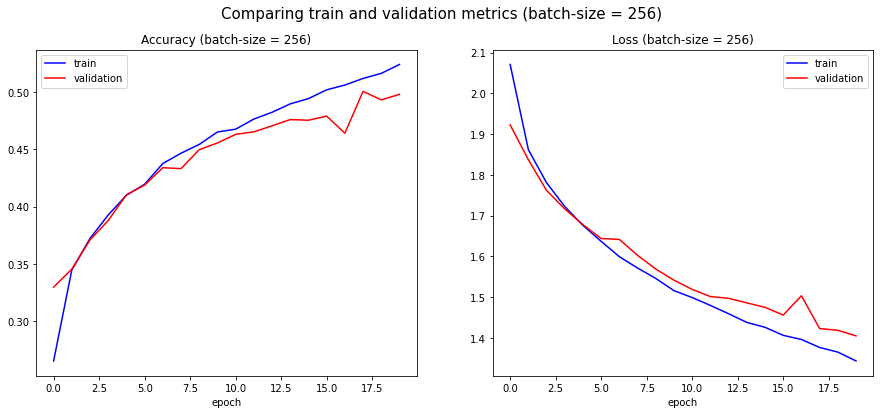

In [ ]:
#@title Multi-Layer Perceptron (Batch-size = 256) - activation functions : {relu, sigmoid}
optimizer = SGD(lr = 0.01, momentum = 0.9)
option = ['relu', 'sigmoid', 'categorical_crossentropy']
mlp_256, History_256 = MLP(x_train, y_train_cat, x_valid, y_valid_cat, 200, 100, 256, option, optimizer, Epoch = 20)
Plot_loss_acc(History_256, batchsize = 256)

313/313 [==============================] - 1s 3ms/step
Stochastic mini batch based MLP (Batch-size = 256) on test data:
 activation functions : (relu, sigmoid)
 Accuracy = 50.23999810218811%
 Test-loss = 1.4018125534057617
 Precision = 50.32213467956454%
 Recall = 50.239999999999995%
 f-score = 49.608251572407625%


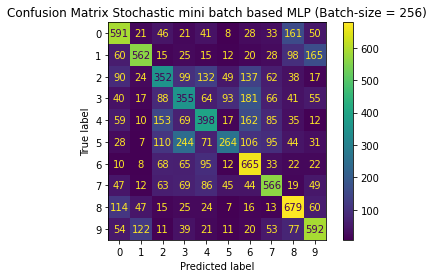

In [ ]:
#@title Metrics on test data (Batch-size = 256) - activation functions : {relu, sigmoid}
loss_test, acc = mlp_256.evaluate(x_test, y_test_cat, verbose = 0)
pred_test = np.argmax(mlp_256.predict(x_test), axis = 1)
ConfusionMatrixDisplay.from_predictions(y_test, pred_test)
plt.title('Confusion Matrix Stochastic mini batch based MLP (Batch-size = 256)')
Precision = precision_score(y_test, pred_test, average = 'weighted')
Recall = recall_score(y_test, pred_test, average = 'weighted')
f_score = f1_score(y_test, pred_test, average = 'weighted')
print(f'Stochastic mini batch based MLP (Batch-size = 256) on test data:\n activation functions : (relu, sigmoid)\n Accuracy = {acc*100}%\n Test-loss = {loss_test}\n Precision = {Precision*100}%\n Recall = {Recall*100}%\n f-score = {f_score*100}%')

>> **Problem 3.** Different Loss Functions

Epoch 1/20
176/176 [==============================] - 5s 24ms/step - loss: 0.3126 - accuracy: 0.2448 - val_loss: 0.2990 - val_accuracy: 0.3060
Epoch 2/20
176/176 [==============================] - 4s 22ms/step - loss: 0.2929 - accuracy: 0.3247 - val_loss: 0.2890 - val_accuracy: 0.3295
Epoch 3/20
176/176 [==============================] - 4s 22ms/step - loss: 0.2850 - accuracy: 0.3542 - val_loss: 0.2840 - val_accuracy: 0.3536
Epoch 4/20
176/176 [==============================] - 4s 22ms/step - loss: 0.2805 - accuracy: 0.3696 - val_loss: 0.2804 - val_accuracy: 0.3671
Epoch 5/20
176/176 [==============================] - 4s 22ms/step - loss: 0.2768 - accuracy: 0.3827 - val_loss: 0.2768 - val_accuracy: 0.3778
Epoch 6/20
176/176 [==============================] - 4s 22ms/step - loss: 0.2738 - accuracy: 0.3958 - val_loss: 0.2742 - val_accuracy: 0.3946
Epoch 7/20
176/176 [==============================] - 4s 22ms/step - loss: 0.2712 - accuracy: 0.4046 - val_loss: 0.2727 - val_accuracy: 0.3847

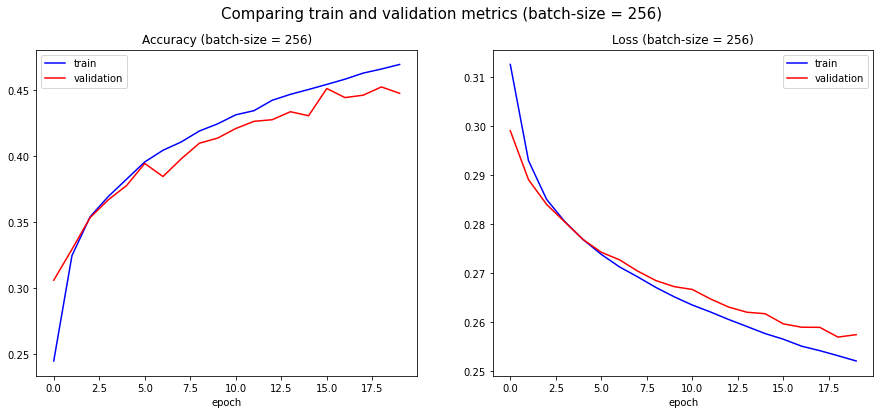

In [ ]:
#@title Multi-Layer Perceptron (Batch-size = 256) - activation functions : {relu, relu} - loss : Poisson
optimizer = SGD(learning_rate = 0.01, momentum = 0.9)
option = ['relu', 'relu', tf.keras.losses.Poisson()]
mlp_256, History_256 = MLP(x_train, y_train_cat, x_valid, y_valid_cat, 200, 100, 256, option, optimizer, Epoch = 20)
Plot_loss_acc(History_256, batchsize = 256)

313/313 [==============================] - 1s 3ms/step
Stochastic mini batch based MLP (Batch-size = 256) on test data:
 activation functions : (relu, relu)
 loss : Poisson
 Accuracy = 45.3000009059906%
 Test-loss = 0.25522226095199585
 Precision = 45.669519591673144%
 Recall = 45.300000000000004%
 f-score = 45.031096665157555%


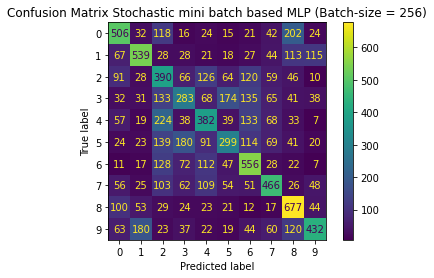

In [ ]:
#@title Metrics on test data (Batch-size = 256) - activation functions : {relu, relu} - loss : Poisson
loss_test, acc = mlp_256.evaluate(x_test, y_test_cat, verbose = 0)
pred_test = np.argmax(mlp_256.predict(x_test), axis = 1)
ConfusionMatrixDisplay.from_predictions(y_test, pred_test)
plt.title('Confusion Matrix Stochastic mini batch based MLP (Batch-size = 256)')
Precision = precision_score(y_test, pred_test, average = 'weighted')
Recall = recall_score(y_test, pred_test, average = 'weighted')
f_score = f1_score(y_test, pred_test, average = 'weighted')
print(f'Stochastic mini batch based MLP (Batch-size = 256) on test data:\n activation functions : (relu, relu)\n loss : Poisson\n Accuracy = {acc*100}%\n Test-loss = {loss_test}\n Precision = {Precision*100}%\n Recall = {Recall*100}%\n f-score = {f_score*100}%')

>> **Problem 4.** Different Optimizers

Epoch 1/20
176/176 [==============================] - 5s 25ms/step - loss: 2.8822 - accuracy: 0.2497 - val_loss: 1.8686 - val_accuracy: 0.3246
Epoch 2/20
176/176 [==============================] - 4s 23ms/step - loss: 1.8391 - accuracy: 0.3315 - val_loss: 1.9183 - val_accuracy: 0.3167
Epoch 3/20
176/176 [==============================] - 4s 24ms/step - loss: 1.7656 - accuracy: 0.3609 - val_loss: 1.7566 - val_accuracy: 0.3661
Epoch 4/20
176/176 [==============================] - 4s 23ms/step - loss: 1.7355 - accuracy: 0.3721 - val_loss: 1.7466 - val_accuracy: 0.3673
Epoch 5/20
176/176 [==============================] - 4s 24ms/step - loss: 1.7010 - accuracy: 0.3840 - val_loss: 1.7811 - val_accuracy: 0.3536
Epoch 6/20
176/176 [==============================] - 4s 24ms/step - loss: 1.6967 - accuracy: 0.3863 - val_loss: 1.7013 - val_accuracy: 0.3879
Epoch 7/20
176/176 [==============================] - 4s 24ms/step - loss: 1.6715 - accuracy: 0.3958 - val_loss: 1.6903 - val_accuracy: 0.3928

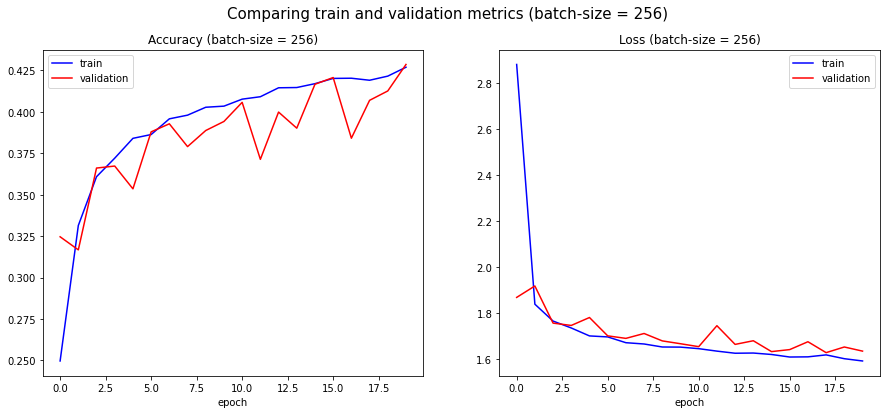

In [ ]:
#@title Multi-Layer Perceptron (Batch-size = 256) - activation functions : {relu, relu} - loss : categorical_crossentropy - optimizer : Adam
optimizer = Adam(lr = 0.01)
option = ['relu', 'relu', 'categorical_crossentropy']
mlp_256, History_256 = MLP(x_train, y_train_cat, x_valid, y_valid_cat, 200, 100, 256, option, optimizer, Epoch = 20)
Plot_loss_acc(History_256, batchsize = 256)

313/313 [==============================] - 1s 3ms/step
Stochastic mini batch based MLP (Batch-size = 256) on test data:
 activation functions : (tanh, tanh)
 loss : categorical_crossentropy
 optimizer : Adam
 Accuracy = 42.48000085353851%
 Test-loss = 1.6113728284835815
 Precision = 42.32336858918484%
 Recall = 42.480000000000004%
 f-score = 41.710063002794726%


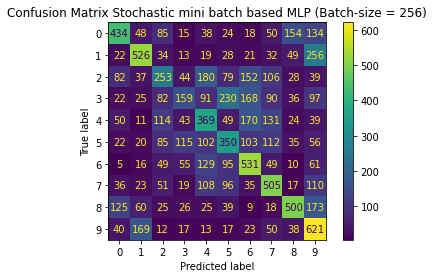

In [ ]:
#@title Metrics on test data (Batch-size = 256) - activation functions : {relu, relu} - loss : categorical_crossentropy - optimizer : Adam
loss_test, acc = mlp_256.evaluate(x_test, y_test_cat, verbose = 0)
pred_test = np.argmax(mlp_256.predict(x_test), axis = 1)
ConfusionMatrixDisplay.from_predictions(y_test, pred_test)
plt.title('Confusion Matrix Stochastic mini batch based MLP (Batch-size = 256)')
Precision = precision_score(y_test, pred_test, average = 'weighted')
Recall = recall_score(y_test, pred_test, average = 'weighted')
f_score = f1_score(y_test, pred_test, average = 'weighted')
print(f'Stochastic mini batch based MLP (Batch-size = 256) on test data:\n activation functions : (tanh, tanh)\n loss : categorical_crossentropy\n optimizer : Adam\n Accuracy = {acc*100}%\n Test-loss = {loss_test}\n Precision = {Precision*100}%\n Recall = {Recall*100}%\n f-score = {f_score*100}%')

> ***Part b.*** Using the Convolutional Neural Network (CNN) and Multi-Layer Perceptron (MLP)

>>**Problem 1.** Adding Convolutional Layers to the MLP Network

Epoch 1/10
176/176 [==============================] - 10s 17ms/step - loss: 1.7199 - accuracy: 0.3786 - val_loss: 1.4684 - val_accuracy: 0.4697
Epoch 2/10
176/176 [==============================] - 3s 16ms/step - loss: 1.3349 - accuracy: 0.5216 - val_loss: 1.2253 - val_accuracy: 0.5607
Epoch 3/10
176/176 [==============================] - 3s 16ms/step - loss: 1.1661 - accuracy: 0.5843 - val_loss: 1.1531 - val_accuracy: 0.6038
Epoch 4/10
176/176 [==============================] - 3s 16ms/step - loss: 1.0234 - accuracy: 0.6398 - val_loss: 1.1111 - val_accuracy: 0.6038
Epoch 5/10
176/176 [==============================] - 3s 16ms/step - loss: 0.8855 - accuracy: 0.6886 - val_loss: 1.0126 - val_accuracy: 0.6414
Epoch 6/10
176/176 [==============================] - 3s 16ms/step - loss: 0.7532 - accuracy: 0.7369 - val_loss: 1.0104 - val_accuracy: 0.6582
Epoch 7/10
176/176 [==============================] - 3s 16ms/step - loss: 0.6363 - accuracy: 0.7797 - val_loss: 1.0226 - val_accuracy: 0.650

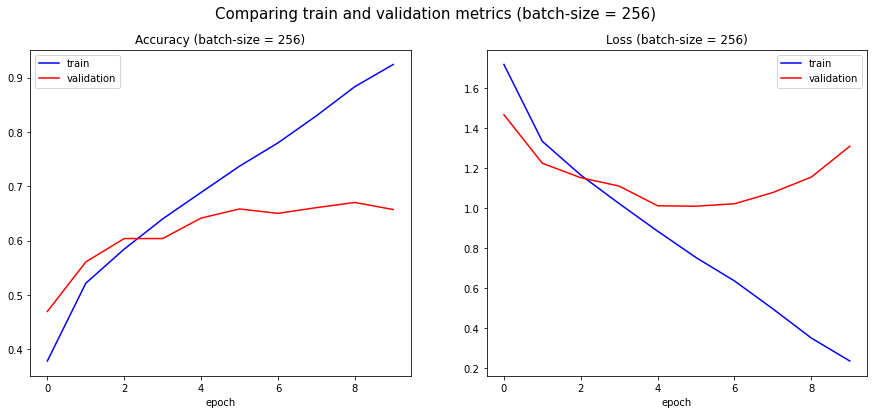

In [7]:
#@title Convolutional Neural Network and Multi-Layer Perceptron (Batch-size = 256)
cnn_256, History_256_cnn = CNN(x_train, y_train_cat, x_valid, y_valid_cat, 200, 100, batchsize = 256, Epoch = 10)
Plot_loss_acc(History_256_cnn, batchsize = 256)

313/313 [==============================] - 1s 2ms/step
Stochastic mini batch based CNN-MLP (Batch-size = 256) on test data:
 Accuracy = 63.70999813079834%
 Test-loss = 1.3793452978134155
 Precision = 65.02650699633617%
 Recall = 63.71%
 f-score = 63.480718076014355%


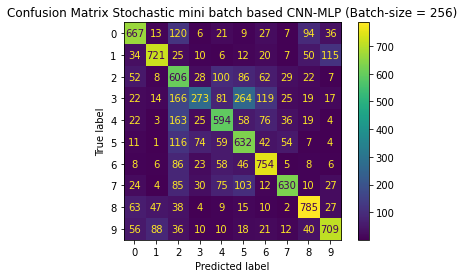

In [8]:
#@title Metrics on test data (Batch-size = 256)
loss_test, acc = cnn_256.evaluate(x_test, y_test_cat, verbose = 0)
pred_test = np.argmax(cnn_256.predict(x_test), axis = 1)
ConfusionMatrixDisplay.from_predictions(y_test, pred_test)
plt.title('Confusion Matrix Stochastic mini batch based CNN-MLP (Batch-size = 256)')
Precision = precision_score(y_test, pred_test, average = 'weighted')
Recall = recall_score(y_test, pred_test, average = 'weighted')
f_score = f1_score(y_test, pred_test, average = 'weighted')
print(f'Stochastic mini batch based CNN-MLP (Batch-size = 256) on test data:\n Accuracy = {acc*100}%\n Test-loss = {loss_test}\n Precision = {Precision*100}%\n Recall = {Recall*100}%\n f-score = {f_score*100}%')

Epoch 1/10
176/176 [==============================] - 3s 12ms/step - loss: 1.5013 - accuracy: 0.4656 - val_loss: 1.7711 - val_accuracy: 0.3740
Epoch 2/10
176/176 [==============================] - 2s 9ms/step - loss: 1.1052 - accuracy: 0.6049 - val_loss: 1.2966 - val_accuracy: 0.5520
Epoch 3/10
176/176 [==============================] - 2s 10ms/step - loss: 0.9390 - accuracy: 0.6665 - val_loss: 1.1632 - val_accuracy: 0.5965
Epoch 4/10
176/176 [==============================] - 2s 9ms/step - loss: 0.8201 - accuracy: 0.7087 - val_loss: 0.9989 - val_accuracy: 0.6578
Epoch 5/10
176/176 [==============================] - 2s 10ms/step - loss: 0.7202 - accuracy: 0.7472 - val_loss: 1.0093 - val_accuracy: 0.6642
Epoch 6/10
176/176 [==============================] - 2s 9ms/step - loss: 0.6325 - accuracy: 0.7764 - val_loss: 1.0759 - val_accuracy: 0.6501
Epoch 7/10
176/176 [==============================] - 2s 10ms/step - loss: 0.5425 - accuracy: 0.8087 - val_loss: 1.2089 - val_accuracy: 0.6359
Ep

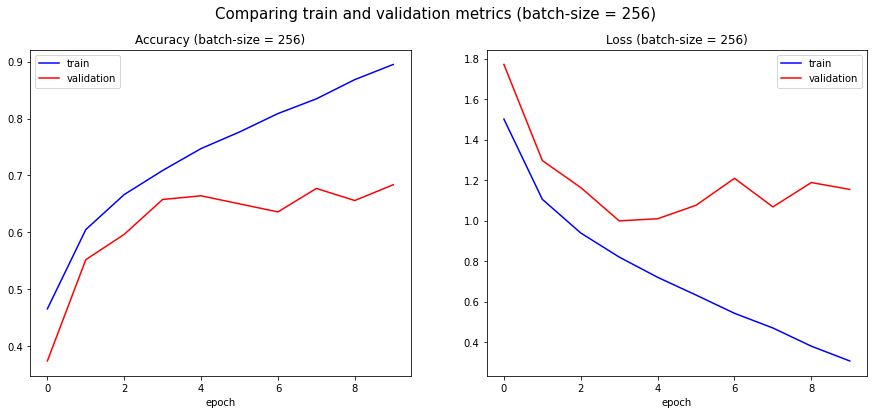

In [9]:
#@title Convolutional Neural Network and Multi-Layer Perceptron (Batch-size = 256) - Pooling and Batch Normalization
cnn_P_BN_256, History_256_cnn_P_BN = CNN_P_BN(x_train, y_train_cat, x_valid, y_valid_cat, 200, 100, batchsize = 256, Epoch = 10)
Plot_loss_acc(History_256_cnn_P_BN, batchsize = 256)

313/313 [==============================] - 1s 2ms/step
Stochastic mini batch based CNN-MLP with pooling and batch normalization(Batch-size = 256) on test data:
 Accuracy = 66.61999821662903%
 Test-loss = 1.207744836807251
 Precision = 67.78356103701262%
 Recall = 66.62%
 f-score = 66.62461943231934%


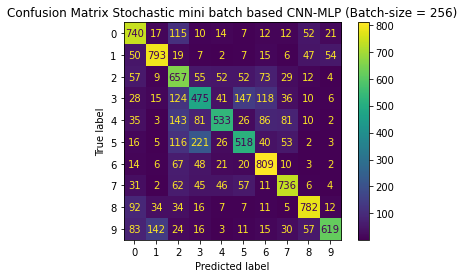

In [10]:
#@title Metrics on test data (Batch-size = 256)
loss_test, acc = cnn_P_BN_256.evaluate(x_test, y_test_cat, verbose = 0)
pred_test = np.argmax(cnn_P_BN_256.predict(x_test), axis = 1)
ConfusionMatrixDisplay.from_predictions(y_test, pred_test)
plt.title('Confusion Matrix Stochastic mini batch based CNN-MLP (Batch-size = 256)')
Precision = precision_score(y_test, pred_test, average = 'weighted')
Recall = recall_score(y_test, pred_test, average = 'weighted')
f_score = f1_score(y_test, pred_test, average = 'weighted')
print(f'Stochastic mini batch based CNN-MLP with pooling and batch normalization(Batch-size = 256) on test data:\n Accuracy = {acc*100}%\n Test-loss = {loss_test}\n Precision = {Precision*100}%\n Recall = {Recall*100}%\n f-score = {f_score*100}%')

Epoch 1/10
176/176 [==============================] - 3s 11ms/step - loss: 1.7103 - accuracy: 0.3847 - val_loss: 1.7686 - val_accuracy: 0.3871
Epoch 2/10
176/176 [==============================] - 2s 10ms/step - loss: 1.3480 - accuracy: 0.5158 - val_loss: 1.2872 - val_accuracy: 0.5481
Epoch 3/10
176/176 [==============================] - 2s 10ms/step - loss: 1.1800 - accuracy: 0.5796 - val_loss: 1.1696 - val_accuracy: 0.5801
Epoch 4/10
176/176 [==============================] - 2s 10ms/step - loss: 1.0748 - accuracy: 0.6179 - val_loss: 1.0286 - val_accuracy: 0.6290
Epoch 5/10
176/176 [==============================] - 2s 10ms/step - loss: 0.9988 - accuracy: 0.6453 - val_loss: 1.0327 - val_accuracy: 0.6375
Epoch 6/10
176/176 [==============================] - 2s 10ms/step - loss: 0.9258 - accuracy: 0.6730 - val_loss: 0.9260 - val_accuracy: 0.6760
Epoch 7/10
176/176 [==============================] - 2s 10ms/step - loss: 0.8790 - accuracy: 0.6905 - val_loss: 0.9457 - val_accuracy: 0.6737

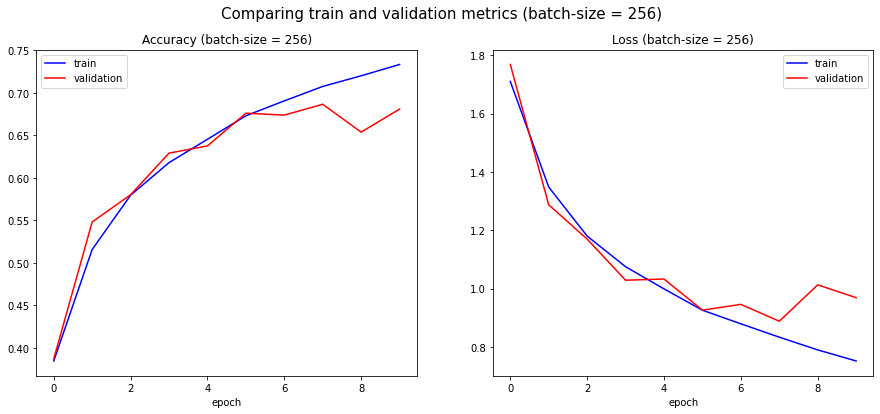

In [12]:
#@title Convolutional Neural Network and Multi-Layer Perceptron (Batch-size = 256) - Pooling and Batch Normalization - Dropout
cnn_P_BN_D_256, History_256_cnn_P_BN_D = CNN_P_BN_dropout(x_train, y_train_cat, x_valid, y_valid_cat, 200, 100, batchsize = 256, Epoch = 10)
Plot_loss_acc(History_256_cnn_P_BN_D, batchsize = 256)

313/313 [==============================] - 1s 2ms/step
Stochastic mini batch based CNN-MLP with pooling, batch normalization, and dropout (Batch-size = 256) on test data:
 Accuracy = 67.18000173568726%
 Test-loss = 0.9824645519256592
 Precision = 67.60237976945372%
 Recall = 67.17999999999999%
 f-score = 66.37947433684938%


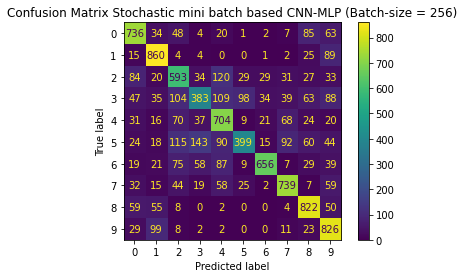

In [13]:
#@title Metrics on test data (Batch-size = 256)
loss_test, acc = cnn_P_BN_D_256.evaluate(x_test, y_test_cat, verbose = 0)
pred_test = np.argmax(cnn_P_BN_D_256.predict(x_test), axis = 1)
ConfusionMatrixDisplay.from_predictions(y_test, pred_test)
plt.title('Confusion Matrix Stochastic mini batch based CNN-MLP (Batch-size = 256)')
Precision = precision_score(y_test, pred_test, average = 'weighted')
Recall = recall_score(y_test, pred_test, average = 'weighted')
f_score = f1_score(y_test, pred_test, average = 'weighted')
print(f'Stochastic mini batch based CNN-MLP with pooling, batch normalization, and dropout (Batch-size = 256) on test data:\n Accuracy = {acc*100}%\n Test-loss = {loss_test}\n Precision = {Precision*100}%\n Recall = {Recall*100}%\n f-score = {f_score*100}%')

Epoch 1/20
176/176 [==============================] - 2s 11ms/step - loss: 1.7016 - accuracy: 0.3912 - val_loss: 1.7933 - val_accuracy: 0.3548
Epoch 2/20
176/176 [==============================] - 2s 10ms/step - loss: 1.3178 - accuracy: 0.5237 - val_loss: 1.3876 - val_accuracy: 0.5051
Epoch 3/20
176/176 [==============================] - 2s 10ms/step - loss: 1.1777 - accuracy: 0.5797 - val_loss: 1.1714 - val_accuracy: 0.5771
Epoch 4/20
176/176 [==============================] - 2s 9ms/step - loss: 1.0854 - accuracy: 0.6147 - val_loss: 1.1436 - val_accuracy: 0.6001
Epoch 5/20
176/176 [==============================] - 2s 10ms/step - loss: 1.0121 - accuracy: 0.6394 - val_loss: 1.1221 - val_accuracy: 0.6056
Epoch 6/20
176/176 [==============================] - 2s 10ms/step - loss: 0.9381 - accuracy: 0.6695 - val_loss: 0.9526 - val_accuracy: 0.6608
Epoch 7/20
176/176 [==============================] - 2s 10ms/step - loss: 0.8914 - accuracy: 0.6820 - val_loss: 0.9605 - val_accuracy: 0.6642


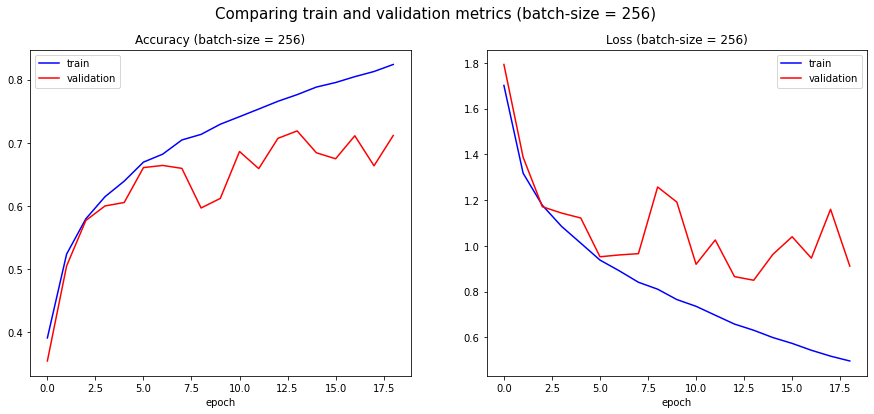

In [18]:
#@title Convolutional Neural Network and Multi-Layer Perceptron (Batch-size = 256) - with early stopping
ES = EarlyStopping(monitor='val_loss', patience = 5)
cnn_P_BN_D_256_es, History_256_cnn_P_BN_D_es = CNN_P_BN_dropout_es(x_train, y_train_cat, x_valid, y_valid_cat, 200, 100, 256, ES, Epoch = 20)
Plot_loss_acc(History_256_cnn_P_BN_D_es, batchsize = 256)

313/313 [==============================] - 1s 2ms/step
Stochastic mini batch based CNN-MLP with early stopping (Batch-size = 256) on test data:
 Accuracy = 70.24000287055969%
 Test-loss = 0.9256798624992371
 Precision = 71.38762219480752%
 Recall = 70.24000000000001%
 f-score = 70.08945596689409%


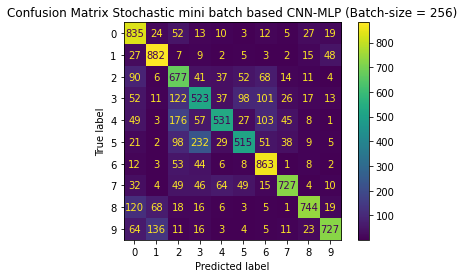

In [19]:
#@title Metrics on test data (Batch-size = 256)
loss_test, acc = cnn_P_BN_D_256_es.evaluate(x_test, y_test_cat, verbose = 0)
pred_test = np.argmax(cnn_P_BN_D_256_es.predict(x_test), axis = 1)
ConfusionMatrixDisplay.from_predictions(y_test, pred_test)
plt.title('Confusion Matrix Stochastic mini batch based CNN-MLP (Batch-size = 256)')
Precision = precision_score(y_test, pred_test, average = 'weighted')
Recall = recall_score(y_test, pred_test, average = 'weighted')
f_score = f1_score(y_test, pred_test, average = 'weighted')
print(f'Stochastic mini batch based CNN-MLP with early stopping (Batch-size = 256) on test data:\n Accuracy = {acc*100}%\n Test-loss = {loss_test}\n Precision = {Precision*100}%\n Recall = {Recall*100}%\n f-score = {f_score*100}%')